# Analyze daily trading volume across a variety of dimensions.


### How has option trading volume changed as a function of time?

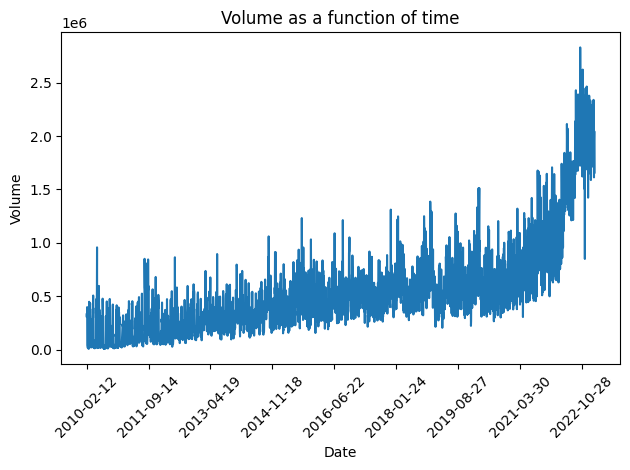

/Users/thedog/Desktop/cours/UCB/223/CODE/functions.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['volume'].resample('M').sum().reset_index()


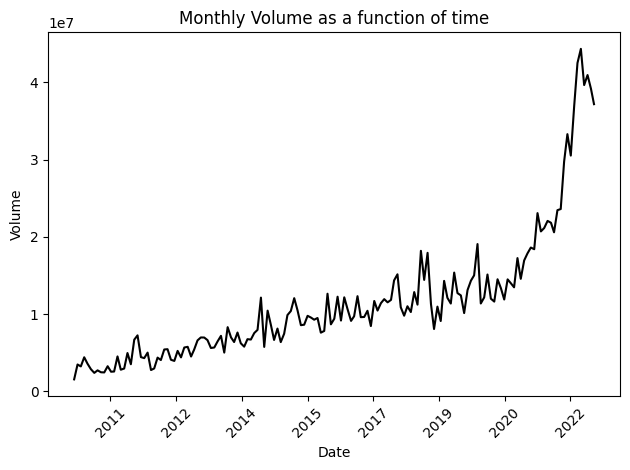

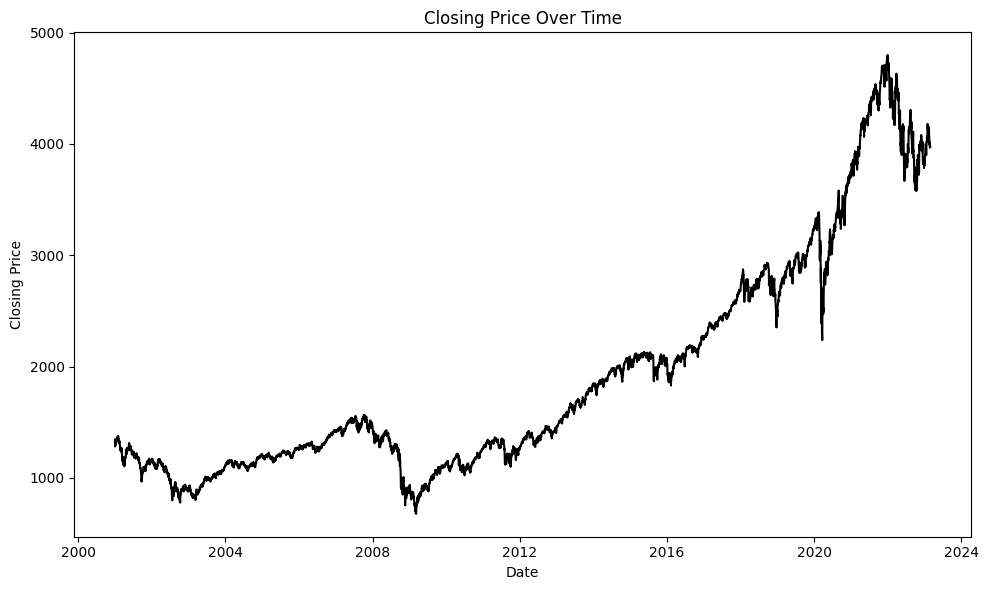

In [1]:
import functions

# put the option data into a dataframe
file_path = 'data/SPX-options.csv'
option_data = functions.read_data(file_path)

# plots the volume as function of time
functions.plot_volume(option_data)
functions.plot_monthly_volume(option_data)

file_path2 = 'data/SPX-index.csv'
index_data = functions.read_data(file_path2)

functions.plot_closing_price(index_data)

### Which option strikes see the most trading volume?

     strike_price    volume
705       4000000  15607549


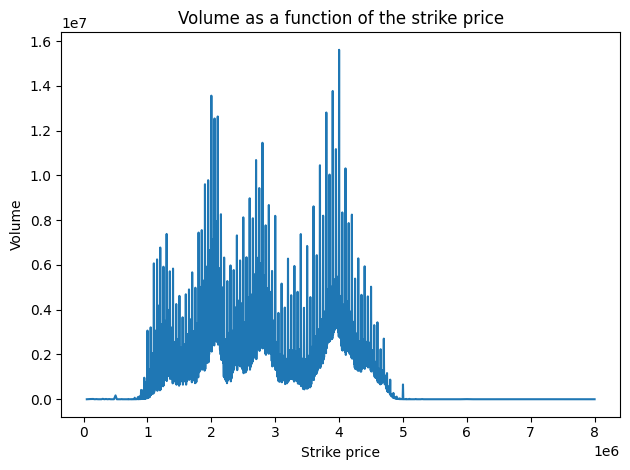

In [2]:
# plot the volume as function of the strike
functions.plot_volume_strike(option_data)

### Is there a difference between calls and puts?

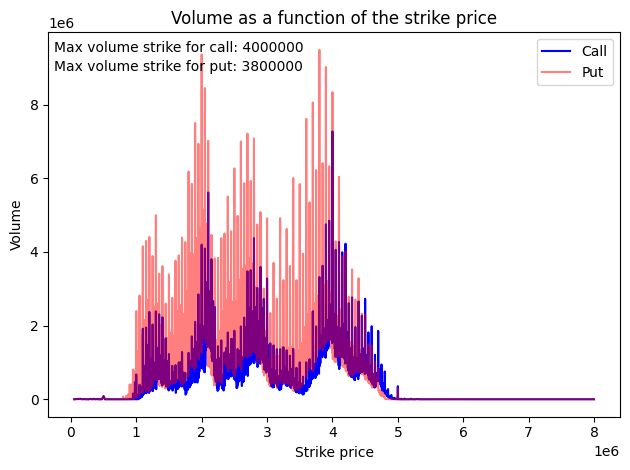

In [3]:
# plot the volumes fot each strike price for put and call
functions.plot_volume_strike_putCall(option_data)


### Pay special attention to very short-dated options, ie. 1DTE (one day to expiration). Can you identify any seasonality patterns?

In [4]:
# put the option data into a dataframe
file_path = 'data/SPX-options.csv'
option_data = functions.read_data(file_path)


## Use Roll’s model the estimate the spread of the SPX index. What proportion of the time does the model produce an imaginary number?

/Users/thedog/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
  0%|          | 0/990 [00:00<?, ?it/s]/Users/thedog/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|██████████| 990/990 [00:00<00:00, 1556.78it/s]


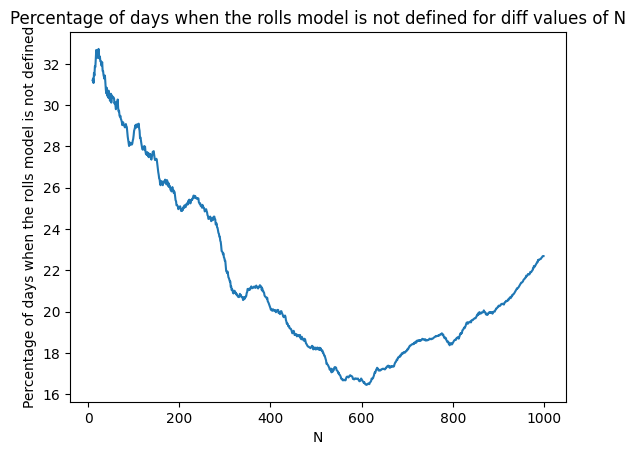

/Users/thedog/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
  0%|          | 0/990 [00:00<?, ?it/s]/Users/thedog/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|██████████| 990/990 [00:00<00:00, 1457.13it/s]


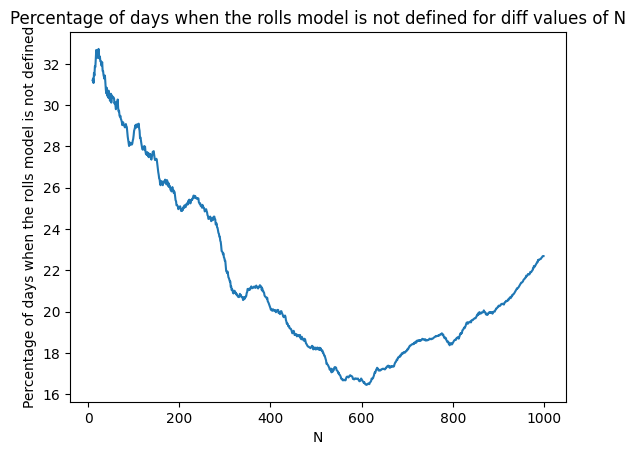

In [1]:
import rolls_model
import functions



# put the index data into a dataframe
file_path = 'data/SPX-index.csv'
data = functions.read_data(file_path)

# plot the percentage of days where the rolls model is Nan as function of the window size
rolls_model.plot_rollsModel(data)

### The option dataset allows you to directly compute the spread. How does the spread behave across the parameter space? (call vs. put, as a function of strike, as a function of time-to- expiration, etc.)


The average spread for call is 4.251135245092616 and for put is 2.094171617792168


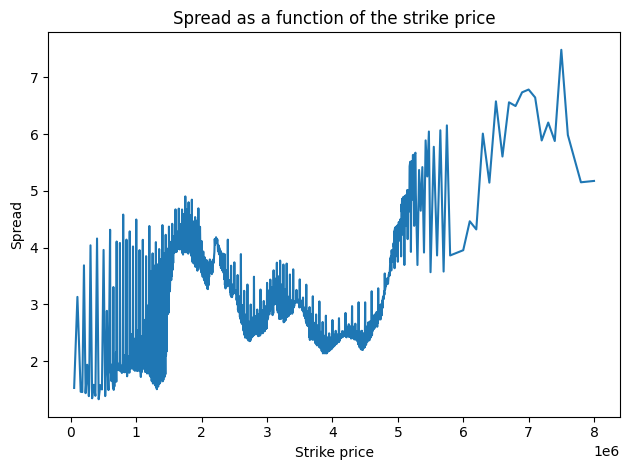

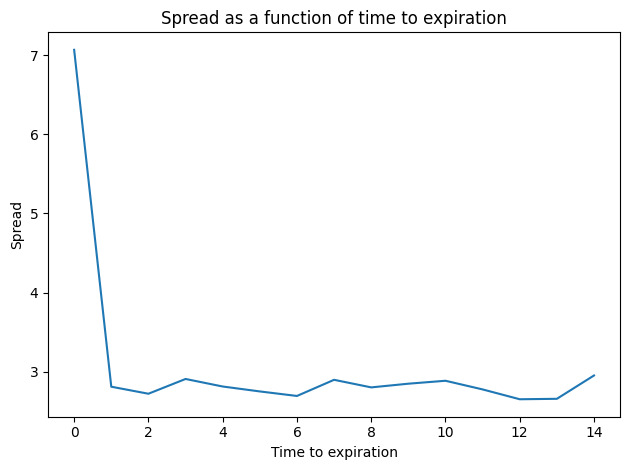

In [6]:
# Shows the average spread for put and call options
file_path = 'data/SPX-options.csv'
data = functions.read_data(file_path)

average_spread = functions.average_spread_call_put(data)
print(f"The average spread for call is {average_spread[0]} and for put is {average_spread[1]}")

# plots the spread as function of the strike
functions.plot_spread_strike(data)

# plots the spread as function of the time to expiration
functions.plot_spread_timeToExp(data)



### • Analyze the different “stylized” facts of asset returns. In particular, report on empirical correlation between successive SPX prices or returns.


100%|██████████| 30/30 [00:00<00:00, 654.25it/s]


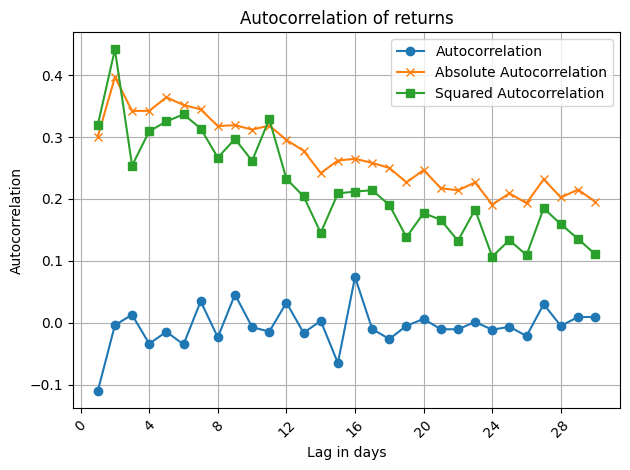

100%|██████████| 249/249 [00:00<00:00, 898.87it/s]


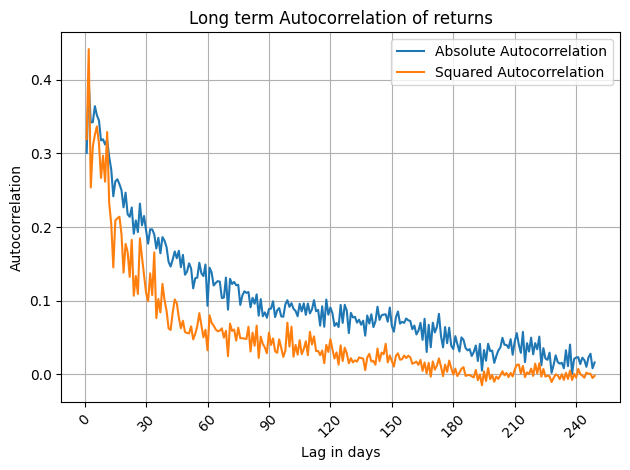

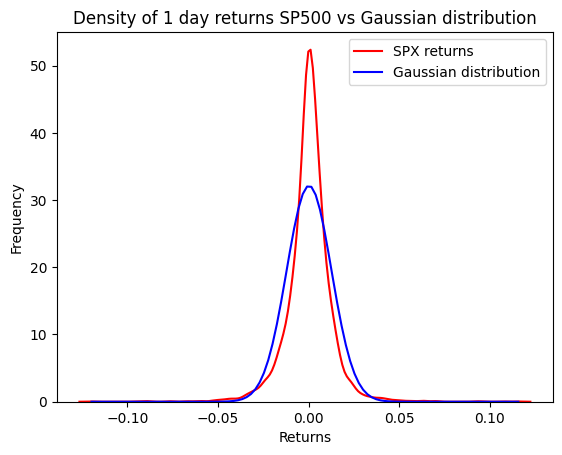

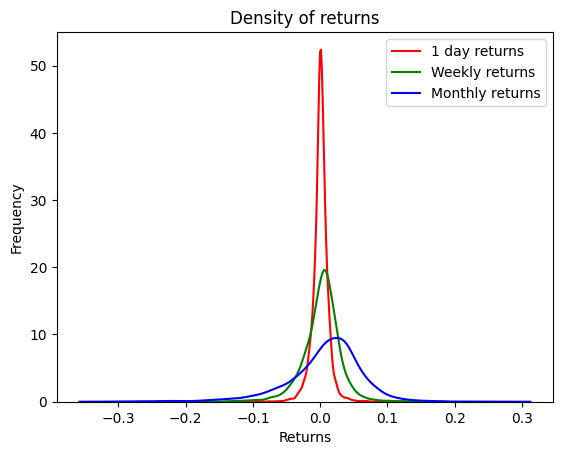

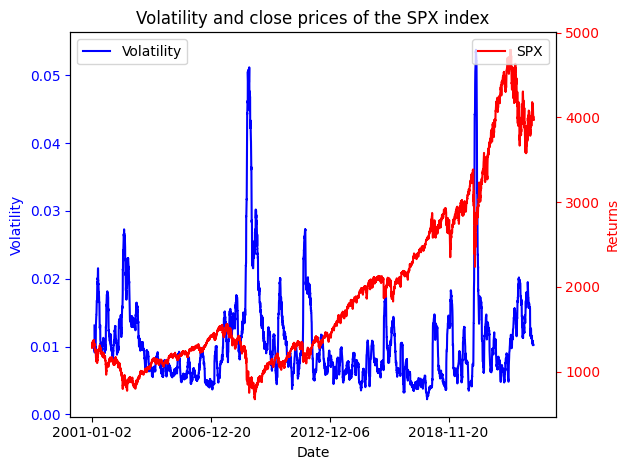

In [7]:
import stylized_facts

# put the index data into a dataframe
file_path = 'data/SPX-index.csv'
data = functions.read_data(file_path)

# plot the correlation of the returns
stylized_facts.plot_autocorrelation(data)

# plot the correlation of absolute and square returnslong term
stylized_facts.plot_long_autocorrelation(data)

# plot the distribution of the returns
stylized_facts.plot_returns_distribution(data)

# compares the distribution for different time scales
stylized_facts.return_distribution_comparison(data)

# plot the vix compared to spx
stylized_facts.plot_volatility(data)


### • Compute and report at-the-money Black-Scholes implied volatility as a function of time. Can you describe how the volatility surface changes through time? (This second part is tricky).


/Users/thedog/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
100%|██████████| 1128/1128 [00:00<00:00, 13673.40it/s]


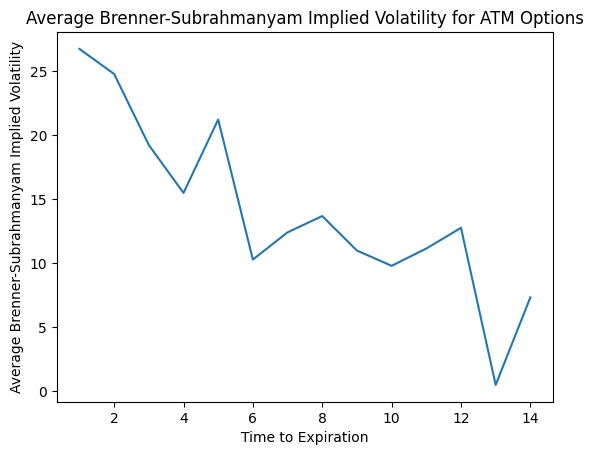

In [8]:
# import the file vol_surface
import atm_vol as vs

# import the index data
file_path = 'data/SPX-index.csv'
data = functions.read_data(file_path)

# plot the average brenner vol atm
vs.plot_avg_atm_vol(option_data)

### • Plot the volatility surface

In [1]:
import volatility_surface
import pandas as pd

# get the option data
option_data = pd.read_csv('data/SPX-options.csv')

# date
date = '2023-02-28'

option_data = volatility_surface.add_IV(option_data, date)

option_data = volatility_surface.add_moneyness_column(option_data)

volatility_surface.plot_volatility_surface(option_data)

/Users/thedog/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
100%|██████████| 2950/2950 [00:00<00:00, 7492.82it/s]
/Users/thedog/Desktop/cours/UCB/223/CODE/volatility_surface.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  option_data['IV'] = option_data['IV'] * 100
/Users/thedog/Desktop/cours/UCB/223/CODE/volatility_surface.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Percentage of data with IV = 0 : 56.48710166919575 %


# • Identify and test your own trading strategy.
### – Here’s a very simple strategy to get you started: restrict yourself only to at-the-money 1DTE straddles (when you’re long a straddle, you’re long one call and one put of the same strike).
### – What is your PnL if you buy a 1DTE at-the-money straddle every day? What if you sell?
### – Can you come up with a trading rule that decides whether to buy or sell that performs better?

/Users/thedog/Desktop/cours/UCB/223/CODE/strategy.py:264: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



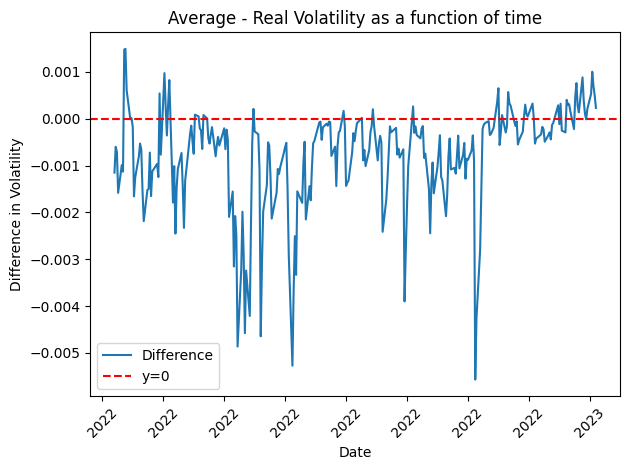

/Users/thedog/Desktop/cours/UCB/223/CODE/strategy.py:119: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.

100%|██████████| 274/274 [01:37<00:00,  2.80it/s]


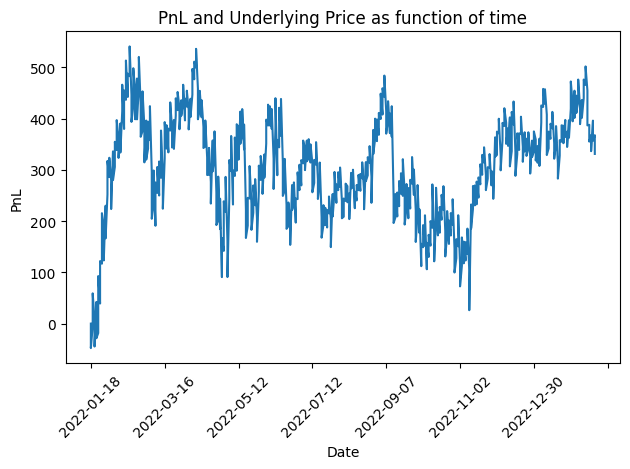

In [10]:
import strategy
import pandas as pd

# dates 
start_date = '2022-01-17'
end_date = '2023-02-17'
N = 5

# load the data
option_data = pd.read_csv('data/SPX-options.csv')
index_data = pd.read_csv('data/SPX-index.csv')

# add the volatility column
index_data = strategy.add_volatility_column(index_data)

# add the average volatility column
index_data = strategy.add_avg_vol(index_data,N)

# plot the volatility
restriced_index_data = index_data[(index_data['date'] >= start_date) & (index_data['date'] <= end_date)]
strategy.plot_averageVSvolatility(restriced_index_data)

# get the pnl
pnl3_df = strategy.pnl3(start_date, end_date, option_data, index_data, N)

# plot the pnl
strategy.plot_pnl(pnl3_df, index_data)

/Users/thedog/Desktop/cours/UCB/223/CODE/strategy.py:119: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.

/Users/thedog/Desktop/cours/UCB/223/CODE/atm_vol.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/thedog/Desktop/cours/UCB/223/CODE/strategy.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

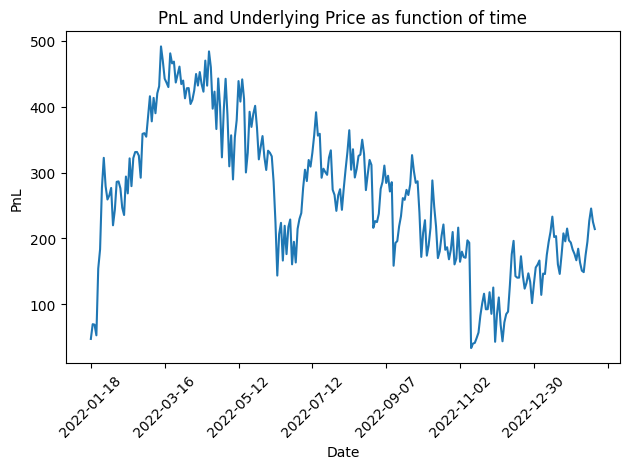

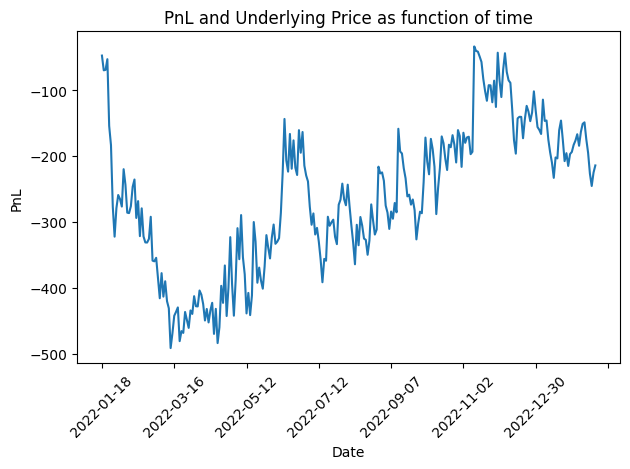

In [11]:
# get the pnl
pnl2_df = strategy.pnl2(start_date, end_date, option_data)
pnl1_df = strategy.pnl1(start_date, end_date, option_data)

# plot the pnl
strategy.plot_pnl(pnl2_df, index_data)
strategy.plot_pnl(pnl1_df, index_data)